# Aviation Accidents Data Analysis

Our company is expanding in to new industries to diversify its portfolio. We are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I've been charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. In this project i will translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

In [229]:
# Load Data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Load the Data
This is a dataset whose file path is 'DATASET/AviationData.csv'. It is data from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

In [230]:
# Load the data
aviation_df = pd.read_csv('DATASET/AviationData.csv',encoding='latin-1', low_memory=False)


aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Looking into the Data
Taking a deeper look at the data to understand the shape of the data and to check for missing values.

In [231]:
# Checking the shape of the data.
aviation_df.shape

(88889, 31)

In [232]:
#Checking data for missing values
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Data Wrangling 

### Completeness
In this section we identify the missing /null values and deal with them on a case by case basis.

In [233]:
# Identify the null values ising the (isnull) or (isna) function.
aviation_df.isnull()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [234]:
aviation_df.isna()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [235]:
#using (.isnull().sum()) to find out the total number of missing values in each column.
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

### STANDARDIZING and DROPPING SOME COLUMNS

Here i attempt to clean up my data by dropping some columns that i deem to not be helpful in answering the question at  hand.

In [236]:
#Standardizing column names, by replacing the fullstops with underscores and 
#converting the first letter to uppercase using the .title method
aviation_df.columns = aviation_df.columns.str.replace('.', '_').str.title()
aviation_df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [237]:
# Dropping the lattitude, longitude, schedule , far description, air carrier and aircraft category.

aviation_df.drop(columns=['Latitude', 'Longitude', 'Airport_Code', 'Amateur_Built', 'Schedule', 'Air_Carrier', 'Aircraft_Category', 'Far_Description', 'Report_Status'], inplace=True)


Here, i am listing the top aircraft makes according to [Assets America](https://assetsamerica.com/aircraft-manufacturers/). Then i standardize their names.

In [238]:
# Removing missing values by Replacing NaN values with None in the 'Make' column

aviation_df['Make'] = aviation_df['Make'].fillna('None')

In [239]:
#Creating a variable named Top_makes with the following aircraft makes: Boeing , Airbus, Bombardier ,Cessna,
#Embraer , Gulf stream, Pilatus ,Hawker , Dassault, Lockheed 

top_makes = aviation_df[aviation_df['Make'].str.contains('|'.join(['Boeing', 'Airbus', 'Bombardier','Cessna', 'Embraer', 'Gulfstream','Pilatus', 'Hawker' , 'Dassault', 'Lockheed']))]
top_makes.head()


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Name,Injury_Severity,Aircraft_Damage,Registration_Number,...,Number_Of_Engines,Engine_Type,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Publication_Date
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,N5142R,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,26-02-2007
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,Fatal(1),Destroyed,N15NY,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,16-04-1980
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,Fatal(4),Destroyed,N4988E,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,BLACKBURN AG STRIP,Non-Fatal,Substantial,N2482N,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,HANOVER,Non-Fatal,Substantial,N7967Q,...,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,01-01-1982


In [240]:
#View my top makes
top_makes['Make'].value_counts()

Make
Cessna                  22227
Boeing                   1594
Airbus Industrie          142
Lockheed                  112
Embraer                   108
                        ...  
Hawker Aircraft Ltd.        1
Hawker-beechcraft           1
Airbus Industries           1
Lockheed-martin             1
Boeing (Stearman)           1
Name: count, Length: 66, dtype: int64

In [241]:
#Standardizing top Make names.
def standardize_make(name):
    if 'Boeing' in name:
        return 'Boeing'
    elif 'Airbus' in name:
        return 'Airbus'
    elif 'Bombardier' in name:
        return 'Bombardier'
    elif 'Cessna' in name:
        return 'Cessna'
    elif 'Embraer' in name:
        return 'Embraer'
    elif 'Gulfstream' in name:
        return 'Gulfstream'
    elif 'Pilatus' in name:
        return 'Pilatus'
    elif 'Hawker' in name:
        return 'Hawker'
    elif 'Dassault' in name:
        return 'Dassault'
    elif 'Mitsubishi' in name:
        return 'Mitsubishi'
    else:
        return name

aviation_df['Make'] = aviation_df['Make'].apply(standardize_make)

In [242]:
# Modifying the Dataframe to include only the rows where the 'Make' is one of these manufacturers.

modified_df = aviation_df[aviation_df['Make'].isin(['Boeing', 'Airbus', 'Bombardier','Cessna', 'Embraer', 'Gulfstream','Pilatus', 'Hawker' , 'Dassault', 'Lockheed'])]

print(modified_df['Make'].value_counts())

Make
Cessna        22242
Boeing         1660
Airbus          187
Gulfstream      170
Lockheed        112
Embraer         109
Dassault         60
Hawker           58
Bombardier       55
Pilatus          40
Name: count, dtype: int64


In [243]:
#Creating a new column named Total_passengers
aviation_df['Total_Passengers'] = aviation_df['Total_Fatal_Injuries'] + aviation_df['Total_Serious_Injuries'] + aviation_df['Total_Minor_Injuries'] + aviation_df['Total_Uninjured']

In [244]:
#Creating a new column with the number of fatal injuries per accident
aviation_df['Fatal_Injury_Number'] = aviation_df['Total_Fatal_Injuries'] / aviation_df['Total_Passengers']

In [245]:
#Creating a new column with the number of uninjured per accident
aviation_df['Uninjured_Number'] = aviation_df['Total_Uninjured'] / aviation_df['Total_Passengers']

In [246]:
# Dropping NaN values in the columns created above
mask = aviation_df[['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Fatal_Injury_Number', 'Uninjured_Number']].isna().any(axis=1)
aviation_df = aviation_df[~mask]

### Grouping Injuries by aircraft make and model

In [247]:
#Group fatal injuries by make and model
fatal_injuries = aviation_df.groupby(['Make', 'Model'])['Total_Fatal_Injuries'].sum().reset_index()
serious_injuries = aviation_df.groupby(['Make', 'Model'])['Total_Serious_Injuries'].sum().reset_index()
minor_injuries = aviation_df.groupby(['Make', 'Model'])['Total_Minor_Injuries'].sum().reset_index()
uninjured = aviation_df.groupby(['Make', 'Model'])['Total_Uninjured'].sum().reset_index()


## VISUALIZATION


### 1. INJURY RATE VISUALIZATION

This is a bar chart visualization displaying how the number of Fatalities, Minor injuries and Major injuries varies across different aircraft manufacturers.

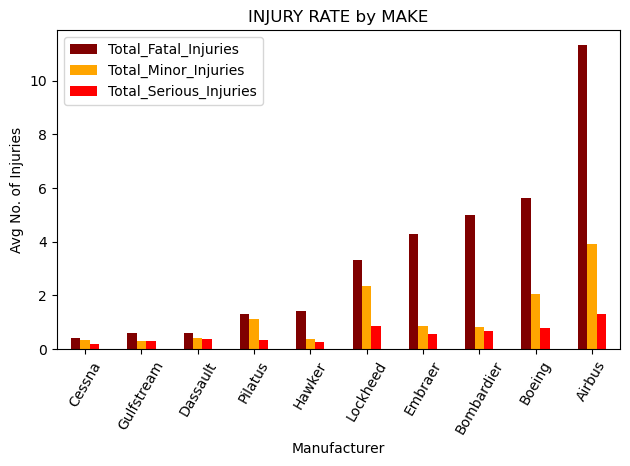

In [248]:
# Grouping the data and calculating the mean
grouped_df = modified_df.groupby(['Make'])[['Total_Fatal_Injuries', 'Total_Minor_Injuries', 'Total_Serious_Injuries']].mean()

# Sorting values in ascending order of fatalities
sorted_df = grouped_df.sort_values(by='Total_Fatal_Injuries', ascending=True)

# Creating a new figure and a set of subplots
fig, ax = plt.subplots()

# Creating a bar plot
sorted_df.plot(kind='bar', stacked=False, ax=ax, color=['maroon','orange','red'])

# Seting title and labels of the x & y axes
ax.set_title('INJURY RATE by MAKE')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Avg No. of Injuries')

# Adjusting the layout
plt.tight_layout()

# Rotating the x-axis labels by 60 degrees
plt.xticks(rotation=60)

# Finally, showing the plot
plt.show()

### RECOMMENDATION

From the graph above, I recommend:


### 1. UNINJURED RATE VISUALIZATION

#### a) Uninjured by Airbus Model

In [251]:
# Group by 'Make' and calculate mean 'Uninjured Rate' and 'Fatal Injury Rate'
grouped_df = top_makes.groupby('Make')[['Uninjured_Number', 'Fatal_Injury_Number']].mean().reset_index()

# Sets the figure size
plt.figure(figsize=(10, 6))

# Defines the width of the bars
bar_width = 0.35

# Create an array with the positions of the bars on the x axis
r1 = np.arange(len(grouped_df['Make']))

# Create a bar plot for 'Uninjured Rate'
plt.bar(r1 - bar_width/2, grouped_df['Uninjured_Number'], color='b', width=bar_width, label='Uninjured Rate')

# Create a bar plot for 'Fatal Injury Rate' next to the first one
plt.bar(r1 + bar_width/2, grouped_df['Fatal_Injury_Number'], color='r', width=bar_width, label='Fatality Rate')

# Add a legend
plt.legend(loc='upper left')

# Set labels and title
plt.xlabel('Make')
plt.ylabel('Rate')
plt.title('Mean Uninjured and Fatality Rate By Make')

# Set the position of the x ticks
plt.xticks(r1, grouped_df['Make'])

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

KeyError: "Columns not found: 'Fatal_Injury_Number', 'Uninjured_Number'"

In [ ]:
# Group by 'Model', calculate mean 'Uninjured_Rate', sort values and plot
ax = top_makes[top_makes['Make']=='Airbus'].groupby('Model')['Uninjured_Number'].mean().sort_values().plot(kind='bar', stacked=True)

# Set labels and title
ax.set(xlabel='Model', ylabel='Uninjured Rate', title='Uninjured Rate By Airbus Model')

KeyError: 'Column not found: Uninjured_Number'

### 